## Fase 1: Exploración y Limpieza

Antes de empezar el proyecto, debemos importar las librerías que vamos a utilizar a lo largo del ejercicio.

In [583]:
# Importamos las librerías.

# Tratamiento de datos.
import pandas as pd
import numpy as np

# Tratamiento de nulos.
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer 

# Visualización.
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables (estadística).
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración.
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings.
import warnings
warnings.filterwarnings("ignore")

In [584]:
#Leemos e importamos los CSVs para empezar a trabajar con ellos en dataframe.
df_flight_activity = pd.read_csv('Customer_Flight_Activity.csv')
df_loyalty_activity= pd.read_csv('Customer_Loyalty_history.csv')

In [585]:
# Ahora hacemos la unión de los dos dataframes, la unión se va a hacer con un merge, uniéndolo por la columna 'Loyalty Number' en común.
# El how es 'outer' porque necesito toda la información de todas las columnas.
df_customer = df_flight_activity.merge(df_loyalty_activity, on="Loyalty Number", how="outer")

In [571]:
# Guardamos la unificación de los CSVs anteriores.
df_customer.to_csv("df_customer_nulls.csv", index=False)

In [586]:
# A continuación, comprobamos cómo ha quedado la unión de los dos dataframes. Con el '.head()' puedo ver las 5 primeras filas.
# Para mirar nuestro dataframe también podemos utilizar '.tail()' que muestra las últimas 5 filas o '.sample()', que muestra una fila al azar.
df_customer.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [587]:
# ¿Habrá duplicados?.
df_customer.duplicated().sum()

1864

In [588]:
# Al obtener esa cantidad de duplicados tan alta, he comprobado los duplicados.
df_customer[df_customer.duplicated(keep= False)]


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
984,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
985,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
987,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
988,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
989,101902,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402331,992168,2017,9,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
402346,992168,2018,6,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
402347,992168,2018,6,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
402354,992168,2018,9,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN


In [589]:
# Eliminamos las filas duplicadas, dejando la fila original.
df_customer= df_customer.drop_duplicates(keep='first')
df_customer


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999986,2018,7,15,0,15,1995,199.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405620,999986,2018,9,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405621,999986,2018,10,6,0,6,708,70.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405622,999986,2018,11,11,4,15,2040,204.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [590]:
# De nuevo, consultamos los duplicados, comprobando que sí se ha ejecutado correctamente el código anterior.
df_customer[df_customer.duplicated(keep= False)]


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [591]:
# Para resumir los principales valores estadísticos, usamos '.describe()'.
df_customer.describe().T


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
Flights with Companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
Total Flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00
Distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
Points Accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50
Points Redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.00,0.00,71.00


Si observamos la tabla obtenida arriba, nos ha llamado la atención que en el concepto 'Salary' haya valores negativos (aunque sea en la columna 'min').
Inicialmente, considerando que el concepto 'Salary' se refería a sueldo; nos planteamos la opción de desestimar estos valores ya que un salario no puede ser negativo.
Al comprobar que el concepto 'Salary' se refiere a: 'Ingreso anual estimado del cliente'; vamos a trabajarlo con dos fines distintos:
    - El primero, considerando que estos datos negativos son ingresos perdidos; es decir, un déficit entre lo que la aerolínea espera ingresar con ese cliente y lo que realmente termina facturando. Estudiamos estos negativos creyendo, por tanto, que se refiere a una realidad financiera de mercado.
    - La segunda, como otro punto de vista, analizaremos el concepto 'salary' como ingresos estimados en positivo. Es posible que los negativos no representen correctamente el concepto de ingresos. Tal vez los datos no fueron procesados correctamente o hubo algún error en el modelo que genera este valor, por tanto, procederemos a convertir estos negativos en valores positivos.


In [592]:
# Filtramos las filas donde la columna 'Salary' tiene valores negativos.
valores_negativos = df_customer[df_customer['Salary'] < 0]
valores_negativos


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
7032,115505,2017,1,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
7033,115505,2017,2,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
7034,115505,2017,3,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
7035,115505,2017,4,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
7036,115505,2017,5,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387811,959977,2018,8,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
387812,959977,2018,9,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
387813,959977,2018,10,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
387814,959977,2018,11,12,2,14,2450,245.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN


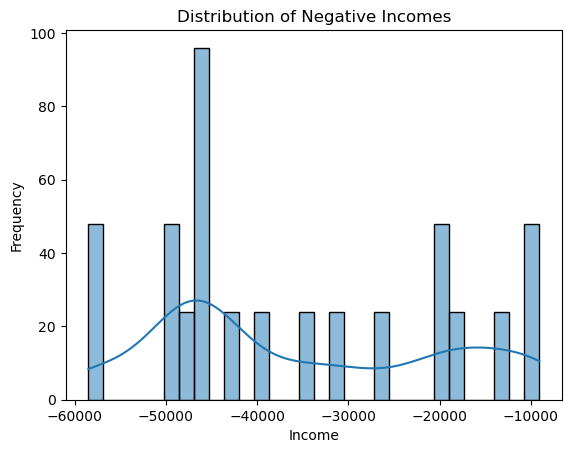

In [593]:
# Histograma solo para ingresos negativos.
sns.histplot(df_customer[df_customer['Salary'] < 0]['Salary'], bins=30, palette="Blues", kde=True)

# Título y etiquetas.
plt.title('Distribution of Negative Incomes')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


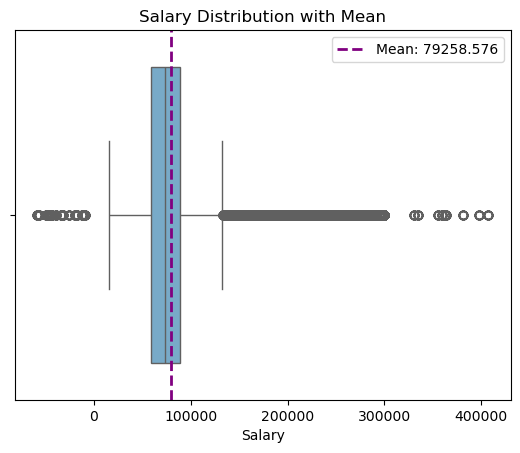

In [594]:
# Hacemos la media de 'Salary' con los valores en positivo y negativo.
mean_salary= df_customer['Salary'].mean()

# Boxplot.
sns.boxplot(x=df_customer['Salary'], palette="Blues")
plt.axvline(mean_salary, color='purple', linestyle='--', linewidth=2, label=f'Mean: {mean_salary:.3f}')

# Título y etiquetas.
plt.title('Salary Distribution with Mean')
plt.xlabel('Salary')
plt.legend()
plt.show()


En este gráfico podemos identificar cómo los valores negativos afectan a la media, ver los 'outliers' y cómo se distribuyen los datos en general.
Podemos ver que la media de 'Salary' con los negativos es de 79258.57628524046
Este dato lo necesitamos para, después, hacer la media con todos los valores en positivo y ver como afecta este cambio para, más tarde, poder comentarlo con nuestro cliente.

In [581]:
# Para pasar los valores negativos a positivos.
df_customer['Salary'] = df_customer['Salary'].abs()

# Comprobamos que no hay valores negativos.
df_customer[df_customer['Salary'] < 0]


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


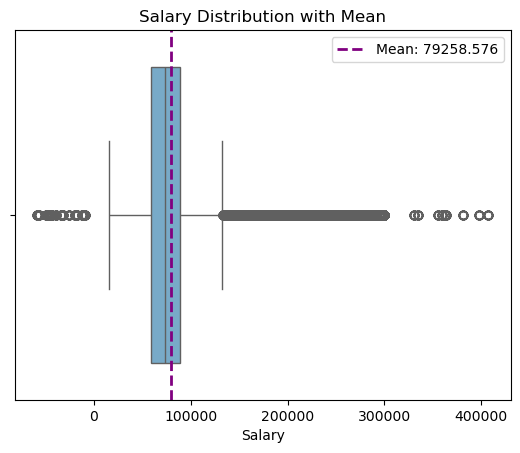

In [595]:
# Media con los valores ya en positivo.
mean_salary_positive= df_customer['Salary'].mean()

# Boxplot.
sns.boxplot(x=df_customer['Salary'], palette="Blues")
plt.axvline(mean_salary_positive, color='purple', linestyle='--', linewidth=2, label=f'Mean: {mean_salary_positive:.3f}')

# Título y etiquetas.
plt.title('Salary Distribution with Mean')
plt.xlabel('Salary')
plt.legend()
plt.show()


En este gráfico podemos identificar la media, habiendo convertido los valores negativos en valores positivos, ver los 'outliers' y cómo se distribuyen los datos en general.
Podemos ver que la media de 'Salary' es de 79371.73290215588.

Comparando ambas medias y gráficas llegamos a la conclusión de:
    - La diferencia entre medias es insignificativa (113,1567), siempre teniendo en cuenta que estamos trabajando con 'macrocifras' que hacen que el valor media no se vea practicamente alterado.

Tras este análisis, deberiamos hablar con nuestro cliente y esclarecer algunas informaciones:
    - Primero, deberíamos confirmar con él la primera duda que nos ha llegado, siendo esta el porqué de esos valores negativos en 'Salary'. Entender cómo se calculan sus ingresos estimados y qué factores afectan el modelo.
    - Por último, deberíamos confirmar con él si estos datos en negativo, de haberlos, se deben a un uso inapropiado del programa de fidelización, por ejemplo, un canjeo másivo de puntos y/o beneficios añadidos al 'Loyalty Program'.

En lo sucesivo, la columna 'Salary' se va a trabajar con valores positivos, siguiendo el segundo razonamiento, arriba mencionado.

In [596]:
# Comenzamos con la gestión de nulos.
# Aquí vemos las entradas y las columnas de nuestro dataframe, los tipos de datos y los nulos que tiene cada columna.
df_customer.info()


<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13  Post

In [597]:
# Estudiamos los nulos que tenemos, hay tres columnas con valores nulos, las tres de tipo numérico.
df_customer.isnull().sum()


Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
dtype: int64

In [567]:
# Vamos a ver el porcentaje de nulos, para ver como imputarlos; ya que depende de su porcentaje se imputa de diferente forma.
df_customer.isnull().sum()/df_customer.shape[0]*100


Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
Country                        0.0
Province                       0.0
City                           0.0
Postal Code                    0.0
Gender                         0.0
Education                      0.0
Salary                         0.0
Marital Status                 0.0
Loyalty Card                   0.0
CLV                            0.0
Enrollment Type                0.0
Cancellation Year              0.0
Cancellation Month             0.0
Enrollment Date                0.0
dtype: float64

El porcentaje de nulos es alto, ya que este porcentaje se considera alto entre el 15/20%.
La columna 'Salary', la vamos a imputar con una técnica avanzada ya que el valor de porcentaje es alto (25.33%).
Antes de imputar estos nulos, y ante la complejidad de esta columna, vamos a estudiar sus valores mediante dos gráficas: un histograma para ver la distribución y un Boxplot para resaltar los outliers.

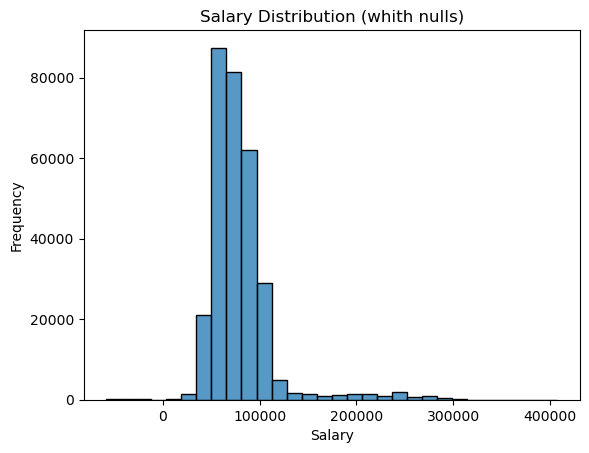

In [598]:
# Histograma.
sns.histplot(df_customer['Salary'],bins = 30, palette='Blues')

# Título y etiquetas.
plt.title('Salary Distribution (whith nulls)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


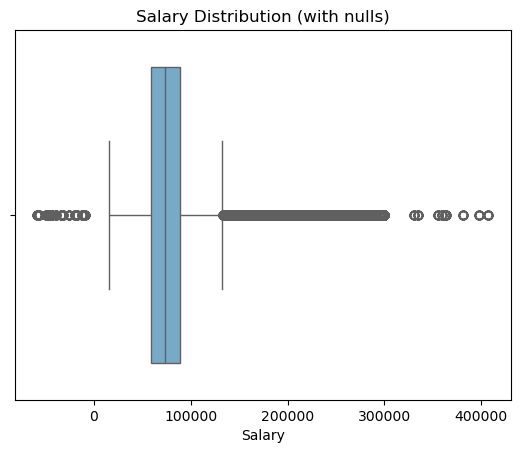

In [599]:
# Boxplot.
sns.boxplot(x=df_customer['Salary'], palette='Blues')

# Título y etiquetas.
plt.title('Salary Distribution (with nulls)')
plt.xlabel('Salary')
plt.show()


In [ ]:
# Vamos a imputar con 'IterativeImputer'.
# El 'robot' utiliza las columnas con datos completos para realizar predicciones, optimizando la información disponible,
# ajustándose lo máximo posible a los valores esperados.

imputer_iter = IterativeImputer(max_iter= 100,random_state= 42)
df_customer['Salary'] = imputer_iter.fit_transform(df_customer[['Salary']])

print(df_customer['Salary'])


0         92552.0
1         92552.0
2         92552.0
3         92552.0
4         92552.0
           ...   
405619    46594.0
405620    46594.0
405621    46594.0
405622    46594.0
405623    46594.0
Name: Salary, Length: 403760, dtype: float64


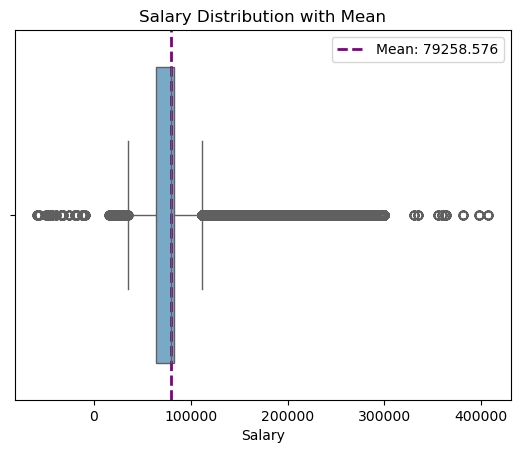

In [601]:
# Media del salario una vez imputados los nulos.
mean_salary_imput=df_customer['Salary'].mean()

# Boxplot.
sns.boxplot(x=df_customer['Salary'], palette='Blues')
plt.axvline(mean_salary_imput, color='purple', linestyle='--', linewidth=2, label=f'Mean: {mean_salary_imput:.3f}')

# Título y etiquetas.
plt.title('Salary Distribution with Mean')
plt.xlabel('Salary')
plt.legend()
plt.show()


En este gráfico podemos identificar la media, habiendo imputado los nulos, ver los 'outliers' y cómo se distribuyen los datos en general.
Podemos ver que la media de 'Salary' es de 79371.73290215591.
Con este resultado, vemos que después de imputar los nulos; la diferencia es casi inapreciable.


Continuamos con la gestion de nulos en 'Cancellation Year' y 'Cancellation Month', estas columnas tienen casi un 88% de nulos. Eso me lleva a pensar que hay muchos nulos porque muy poca gente ha cancelado la suscripción del programa de lealtad. Por ello, al ser tan alto ese porcentaje pero a la vez tan importantes esas columnas, no se pueden borrar. Las voy a imputar con un fillna('Activate Customer'). 

In [602]:
# Imputamos las dos columnas.
df_customer[['Cancellation Month', 'Cancellation Year']] = df_customer[['Cancellation Month', 'Cancellation Year']].fillna('Activate Customer')


In [603]:
# Comprobamos que no hay nulos
df_customer.isnull().sum()


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
dtype: int64

Damos por finalizada la gestión de nulos.
Vamos a seguir con la unificación de datos.

In [604]:
# Unificamos las columnas 'Enrollment Month' y 'Enrollment Year'.
# Creamos una columna nueva con las dos columnas de 'Enrollment month' y 'Enrollment year',en 'Enrollment Date'.
# Hemos tenido que pasarlo a tipo (str) ya que se debe de unir las columnas como cadenas de texto en lugar de sumarlas.

df_customer['Enrollment Date'] = df_customer['Enrollment Year'].astype(int).astype(str) + '-' + df_customer['Enrollment Month'].astype(int).astype(str)

# Convertir la fecha para  que represente solo "mes y año" ya que es lo que es la información que tenemos. No tenemos días.
df_customer['Enrollment Date'] = pd.to_datetime(df_customer['Enrollment Date'], format='%Y-%m').dt.to_period('M')

print(df_customer['Enrollment Date'])


0         2016-08
1         2016-08
2         2016-08
3         2016-08
4         2016-08
           ...   
405619    2018-02
405620    2018-02
405621    2018-02
405622    2018-02
405623    2018-02
Name: Enrollment Date, Length: 403760, dtype: period[M]


In [605]:
# Eliminamos las columnas específicas 'Enrollment Year' y 'Enrollment Month', ya que la hemos unificado 'Enrollment Date'.
df_customer.drop(columns=['Enrollment Year', 'Enrollment Month'], inplace=True)


A continuación, analizamos las columnas, a ver si los datos coinciden con su tipo. 
Resolvemos que debemos cambiar el tipo de la columna 'points accumulated' y pasarla a tipo entero (int).

In [606]:
# Analizamos las columnas.
df_customer.dtypes


Loyalty Number                     int64
Year                               int64
Month                              int64
Flights Booked                     int64
Flights with Companions            int64
Total Flights                      int64
Distance                           int64
Points Accumulated               float64
Points Redeemed                    int64
Dollar Cost Points Redeemed        int64
Country                           object
Province                          object
City                              object
Postal Code                       object
Gender                            object
Education                         object
Salary                           float64
Marital Status                    object
Loyalty Card                      object
CLV                              float64
Enrollment Type                   object
Cancellation Year                 object
Cancellation Month                object
Enrollment Date                period[M]
dtype: object

In [607]:
# Convertimos la columna 'Points Accumulated' a tipo entero.
df_customer['Points Accumulated'] = df_customer['Points Accumulated'].astype('int64')


In [608]:
# Confirmamos que los cambios se hayan hecho correctamente.
df_customer.dtypes


Loyalty Number                     int64
Year                               int64
Month                              int64
Flights Booked                     int64
Flights with Companions            int64
Total Flights                      int64
Distance                           int64
Points Accumulated                 int64
Points Redeemed                    int64
Dollar Cost Points Redeemed        int64
Country                           object
Province                          object
City                              object
Postal Code                       object
Gender                            object
Education                         object
Salary                           float64
Marital Status                    object
Loyalty Card                      object
CLV                              float64
Enrollment Type                   object
Cancellation Year                 object
Cancellation Month                object
Enrollment Date                period[M]
dtype: object

In [ ]:
# Vamos a ver los valores que tiene cada columna.
for column in df_customer.columns:
    unique_values = df_customer[column].nunique()
    
    if unique_values == 1:
        print(f"La columna '{column}' tiene 1 solo valor.")
    else:
        print(f"La columna '{column}' tiene {unique_values} valores únicos.")


La columna 'Loyalty Number' tiene 16737 valores únicos.
La columna 'Year' tiene 2 valores únicos.
La columna 'Month' tiene 12 valores únicos.
La columna 'Flights Booked' tiene 22 valores únicos.
La columna 'Flights with Companions' tiene 12 valores únicos.
La columna 'Total Flights' tiene 33 valores únicos.
La columna 'Distance' tiene 4746 valores únicos.
La columna 'Points Accumulated' tiene 637 valores únicos.
La columna 'Points Redeemed' tiene 587 valores únicos.
La columna 'Dollar Cost Points Redeemed' tiene 49 valores únicos.
La columna 'Country' tiene 1 solo valor.
La columna 'Province' tiene 11 valores únicos.
La columna 'City' tiene 29 valores únicos.
La columna 'Postal Code' tiene 55 valores únicos.
La columna 'Gender' tiene 2 valores únicos.
La columna 'Education' tiene 5 valores únicos.
La columna 'Salary' tiene 5891 valores únicos.
La columna 'Marital Status' tiene 3 valores únicos.
La columna 'Loyalty Card' tiene 3 valores únicos.
La columna 'CLV' tiene 7984 valores únicos

Revisando los datos, después de que estén todos sin nulos y con su tipología correcta; procedemos a ver detalladamente las columnas y nos hemos dado cuenta de que la columna 'Country' no varía.
Tiene un valor único que es 'Canadá' ya que esta base de datos solo recoge datos de ese país.
Al enfrentarnos a una columna que realmente no nos aporta ningún dato valioso, podríamos eliminarla para simplificar o podemos dejarla por si se amplía esta base de datos y se añaden otros países.

In [ ]:
#Procedemos a guardas el CSV con su limpieza correcta.
df_customer.to_csv("df_customer_non_null.csv", index=False)


## Fase 2: Visualización


En la fase de visualización, vamos a trabajar con el CSV limpio, por lo que vamos a importarlo y empezar con la fase de análisis y visualización.

In [609]:
# Importamos el Dataframe limpio.
df_customer_clean = pd.read_csv('df_customer_non_null.csv')


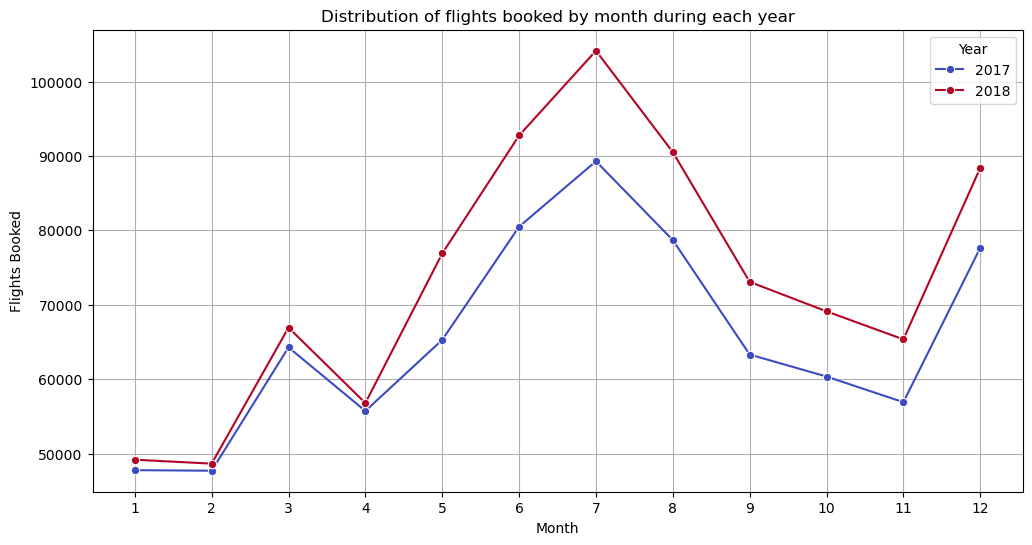

In [ ]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante cada año?.
df_flights_by_month_year = df_customer_clean.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()

# Gráfico de líneas.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_flights_by_month_year, x='Month', y='Flights Booked', hue='Year', marker='o', palette='coolwarm')

# Título y etiquetas.
plt.title('Distribution of flights booked by month during each year')
plt.xlabel('Month')
plt.ylabel('Flights Booked')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid()
plt.show()


En esta gráfica, podemos ver la distribución de los vuelos a lo largo de dos años en concreto (2017,2018), obteniendo datos por meses.
Inicialmente podemos observar que la curva de 2017 indica una menor cantidad de viajes, en general, con respecto a 2018.
Sin embargo, pese a esta diferencia, podemos ver que los meses predominantes son los mismos, pudiendo observarse en los meses de verano (junio, julio, agosto) un pico al alza, al igual que en el mes de diciembre, coincidiendo también con las vacaciones de Navidad.

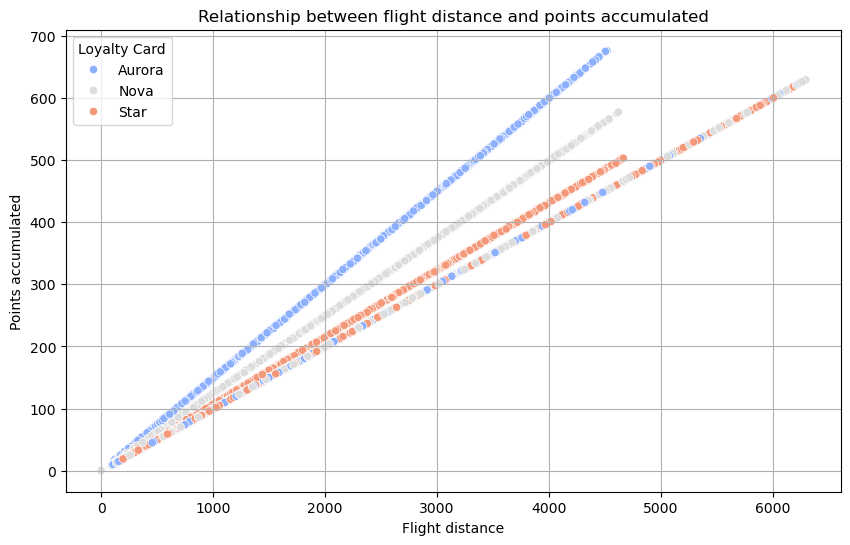

In [ ]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?.
# Gráfico de dispersión (Scatter Plot).
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_customer, x='Distance', y='Points Accumulated', hue='Loyalty Card', palette='coolwarm')

# Título y etiquetas.
plt.title('Relationship between flight distance and points accumulated')
plt.xlabel('Flight distance')
plt.ylabel('Points accumulated')
plt.grid()
plt.show()


En este gráfico, podemos ver la correlación entre los puntos acumulados en la 'Loyalty Card' con las distancía de los vuelos, y podemos ver una relación muy positiva; es decir que a mayor distancia, mayor es el número de puntos para el cliente.

In [616]:
# Creamos un nuevo Dataframe, ya que necesitamos que tenga un filtro en el que no se repitan los 'Loyalty Number'.
df_filtered = df_customer_clean.groupby('Loyalty Number', as_index=False).first()
df_filtered.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Cancellation Year,Cancellation Month,Enrollment Date
0,100018,2017,1,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,Activate Customer,Activate Customer,2016-08
1,100102,2017,1,10,4,14,2030,203,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79258.576285,Single,Nova,2887.74,Standard,Activate Customer,Activate Customer,2013-03
2,100140,2017,1,6,0,6,1200,120,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79258.576285,Divorced,Nova,2838.07,Standard,Activate Customer,Activate Customer,2016-07
3,100214,2017,1,0,0,0,0,0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,Activate Customer,Activate Customer,2015-08
4,100272,2017,1,0,0,0,0,0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,Activate Customer,Activate Customer,2014-01


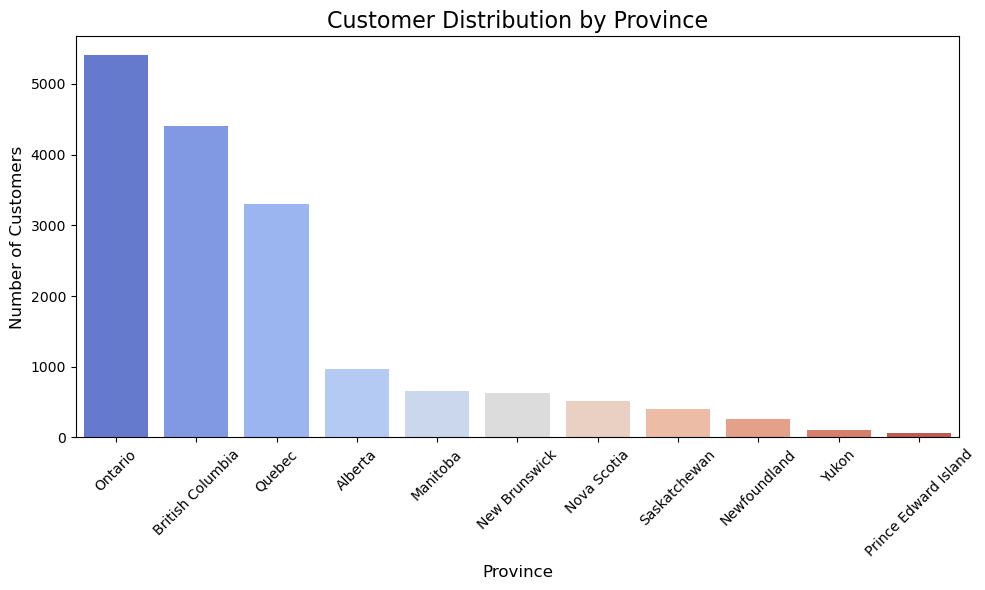

In [618]:
# 3. ¿Cúal es la distribucción de los clientes por provincia o estado?.
distribution_by_province = df_filtered['Province'].value_counts().reset_index()
distribution_by_province.columns = ['Province', 'Customer Count']

# Gráfico de barras.
plt.figure(figsize=(10, 6))
sns.barplot(data=distribution_by_province, x='Province', y='Customer Count', palette='coolwarm')

# Títulos y etiquetas.
plt.title('Customer Distribution by Province', fontsize=16)
plt.xlabel('Province', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En esta gráfica se visualiza la distribución de clientes por provincias y territorios de Canadá. Ontario lidera con el mayor número de clientes, seguido de British Columbia y Quebec; siendo éstos los estados más poblados de Canadá, pero cabe destacar entre estas tres que British Columbia tiene 5.6 M frente a 16 M que tiene Ontario y 9 M que tiene Quebec; sin embargo, es British Columbia la que esta en el segundo puesto de la tabla como provincia más viajera. Las demás regiones, como Alberta, Manitoba muestran progresivamente menos clientes.


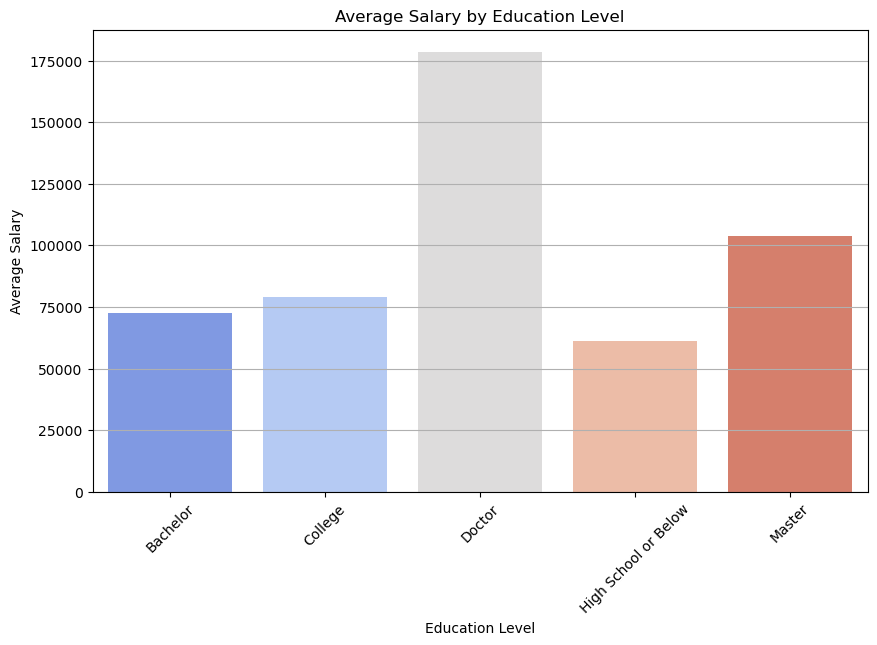

In [619]:
# 4.Compara el salario promedio por nivel educativo.
average_salary = df_filtered.groupby('Education')['Salary'].mean()
average_salary.reset_index()

# Gráfico de barras.
plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary.index, y=average_salary.values, palette="coolwarm")

# Título y etiquetas.
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  
plt.grid(axis='y')
plt.show()


En esta gráfica, podemos ver la correlación de los ingresos estimados medios por cliente y el nivel educativo.
La gráfica muestra que los niveles más altos de educación tienden a correlacionarse con el promedio de los ingresos estimados por los clientes, se puede ver una columna predominante que es la de Doctorado, esto quiere decir que los que tienen el título de doctor son los que más cobran.
Por lo que la educación superior parece ser un factor clave para obtener mejores ingresos económicos.

In [ ]:
colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087']  # Ejemplo de paleta monocromática azul
plt.figure(figsize=(10, 6))
loyalty_type_percentages.plot.pie(autopct='%1.1f%%', colors=colors, legend=False)
plt.title('Distribución por Tipo de Lealtad')
plt.show()


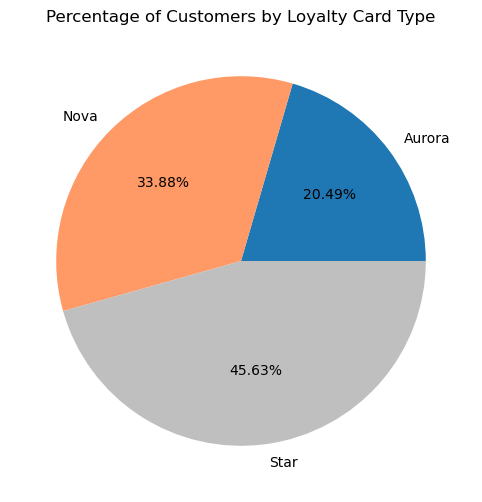

In [633]:
# 5.¿Cúal es el porcentaje de clientes por cada tipo de tarjeta de fidelidad?.
loyalty_counts = df_filtered.groupby('Loyalty Card')['Loyalty Number'].count()
total_loyalty_numbers = loyalty_counts.sum()
loyalty_type_percentages = (loyalty_counts / total_loyalty_numbers) * 100

# Gráfico de Pastel.
plt.figure(figsize=(10, 6))
colores = ['#1f77b4', '#ff9966', '#bfbfbf']
loyalty_type_percentages.plot.pie(autopct='%1.2f%%', colors=colores, legend=False)

# Título y etiquetas.
plt.title('Percentage of Customers by Loyalty Card Type')
plt.ylabel('')  # Sin etiqueta en el eje Y
plt.show()


En esta gráfica se pueden ver los tres tipos de la tarjeta de lealtad que poseen los clientes, los tipos son:
    - Star
    - Nova
    - Aurora
La tarjeta Star es claramente la más popular entre los clientes,seguida por Nova, mientras que Aurora es la que menos proporción tiene al respecto.

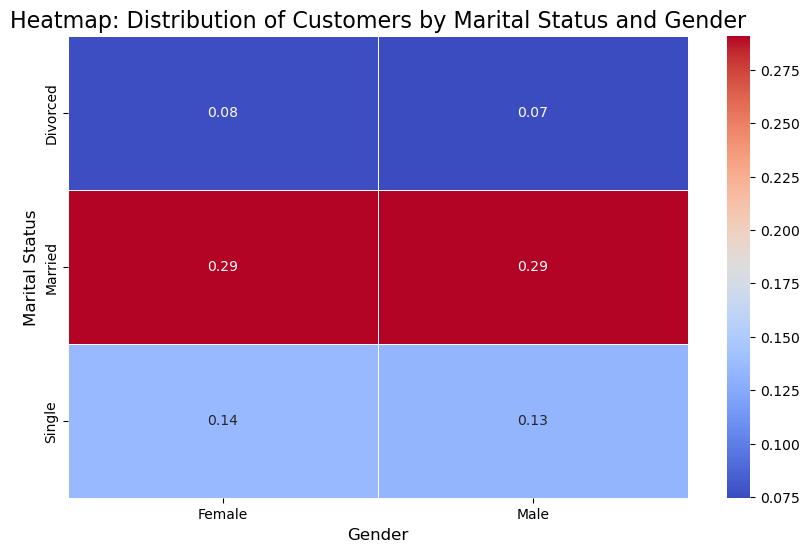

In [634]:
# 6.¿Cómo se distribuyen los clientes según su estado civil y género?.
marital_gender_distribution = pd.crosstab(df_filtered['Marital Status'], df_filtered['Gender'], normalize=True)

# Mapa de calor.
plt.figure(figsize=(10, 6))
sns.heatmap(marital_gender_distribution, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Título y etiquetas.
plt.title('Heatmap: Distribution of Customers by Marital Status and Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Marital Status', fontsize=12)
plt.show()


En este mapa de calor queremos ver la correlación entre el género y el estado civil, he hecho un mapa de calor.

El mapa de calor muestra la distribución de los clientes según su estado civil y género, con la intensidad de color indicando las proporciones en cada grupo. Una posible interpretación es:

    - Clientes casados, tanto mujeres como hombres: Estas categorías destacan con la mayor intensidad (0.29 cada una), lo que sugiere que las personas casadas representan la mayor proporción de la base de clientes.

    - Mujeres solteras: Representan un 0.14, lo que indica una presencia moderada en comparación con otros grupos.

    - Hombres solteros: Con un valor de 0.13, están ligeramente por debajo de las mujeres solteras, lo que refleja una pequeña diferencia de género en esta categoría.

    - Mujeres y hombres divorciados: Ambos se encuentran por debajo de 0.1 (0.08 y 0.07, respectivamente), lo que indica que las personas divorciadas forman los grupos de clientes más pequeños.

## Fase 3: Evaluación de Diferencia en reservas de vuelos por nivel educativo

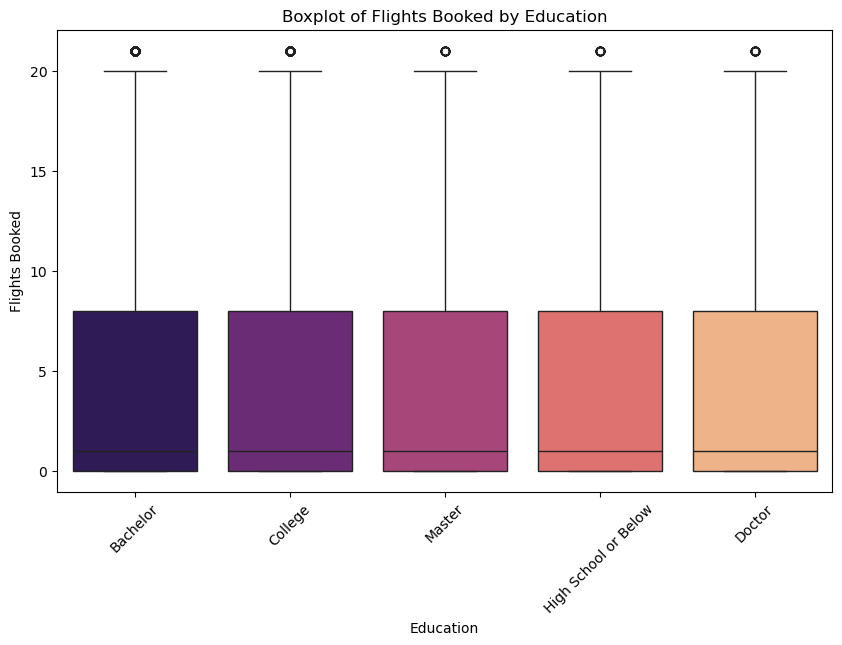

In [ ]:
# 1.Preparación de datos: Filtra el conjunto de datos para incluir unicamente las columnas relevantes: 'Flights Booked' y 'Education'.
df_flights_education = df_customer_clean[['Flights Booked', 'Education']]

# Boxplot.
plt.figure(figsize=(10, 6))
sns.boxplot(x="Education", y="Flights Booked", data=df_flights_education, palette='magma')

# Títulos y etiquetas.
plt.title('Boxplot of Flights Booked by Education')
plt.ylabel('Flights Booked')
plt.xlabel('Education')
plt.xticks(rotation=45)
plt.show()


En este Bloxpot, podemos ver como se estructuran los datos de los vuelos reservados por los clientes y su grado de estudios.

Con este '.describe()', podemos ver un adelanto de estadística descriptiva donde podemos:
    - Count: contabilizar la cantidad de datos.
    - Mean: la media.
    - Std: la desviación estandar.
    - Min: el valor mínimo.
    - Max: el valor máximo.
    - Percentiles: 25%, 50%, 75%

In [637]:
# Estadísticas descriptivas sobre las columnas numéricas.
df_flights_education.describe().T


,count,mean,std,min,25%,50%,75%,max
Flights Booked,403760.0,4.13405,5.230064,0.0,0.0,1.0,8.0,21.0


In [638]:
# Análisis Descriptivo: Agrupa los datos por nivel educativos.
# Calcula estadísticas descriptivas básicas(como el promedio, la desviación estandar) del número de vuelos para cada grupo.
grouped = df_flights_education.groupby('Education')['Flights Booked']

# Calcular estadísticas descriptivas.
mean = grouped.mean()  # Media
median = grouped.median()  # Mediana
varian = grouped.var()  # Varianza
std = grouped.std()  # Desviación estándar

# Mostrar resultados.
print(f"Media:\n{mean}\n")
print(f"Mediana:\n{median}\n")
print(f"Varianza:\n{varian}\n")
print(f"Desviación estándar:\n{std}\n")


Media:
Education
Bachelor                4.110288
College                 4.169744
Doctor                  4.175512
High School or Below    4.176209
Master                  4.200700
Name: Flights Booked, dtype: float64

Mediana:
Education
Bachelor                1.0
College                 1.0
Doctor                  1.0
High School or Below    1.0
Master                  1.0
Name: Flights Booked, dtype: float64

Varianza:
Education
Bachelor                27.265843
College                 27.520938
Doctor                  27.635748
High School or Below    27.449915
Master                  27.185339
Name: Flights Booked, dtype: float64

Desviación estándar:
Education
Bachelor                5.221671
College                 5.246040
Doctor                  5.256971
High School or Below    5.239267
Master                  5.213956
Name: Flights Booked, dtype: float64



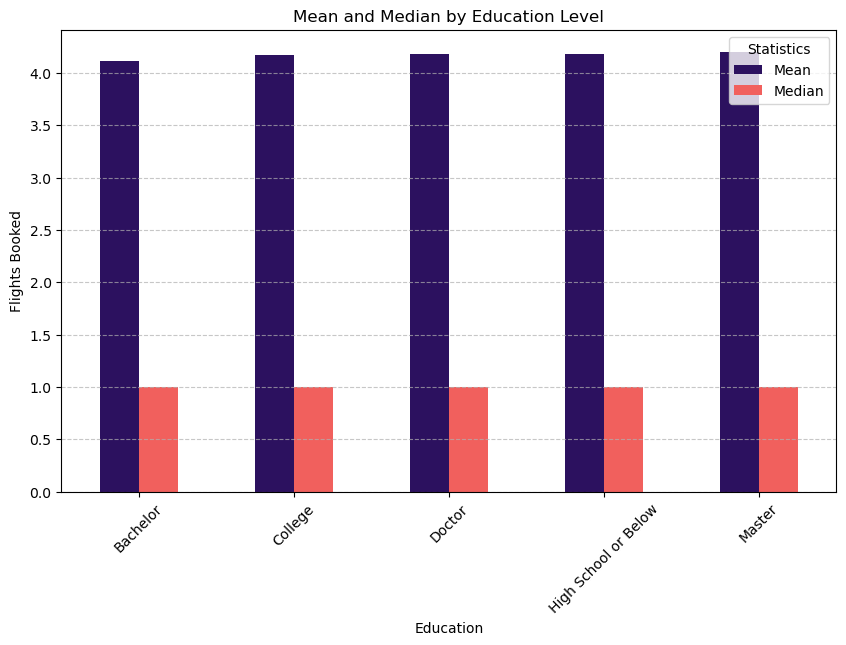

In [648]:
# DataFrame con las estadísticas.
stats_df = pd.DataFrame({
    'Mean': mean,
    'Median': median
})

# Gráfico de barras.
colores= ['#2c115f', '#f1605d']
stats_df.plot(kind='bar', figsize=(10, 6), color= colores)

# Título y etiquetas.
plt.title('Mean and Median by Education Level')
plt.ylabel('Flights Booked')
plt.xlabel('Education')
plt.xticks(rotation=45)
plt.legend(title='Statistics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


En este gráfico, podemos ver la media y la mediana:
    - La media se sitúa alrededor de 4. 
    Esto significa que, al sumar todos los valores y dividirlos entre las categorías disponibles (en este caso 5), obtenemos dicho resultado. Sin embargo, este valor podría no ser completamente representativo, ya que puede estar influenciado por valores extremos.
    - La mediana tiene un valor de 1.
     Esto indica que, al ordenar todos los datos de menor a mayor, el número central en la distribución es 1. Este resultado suele ser más fiable, ya que no se ve afectado por valores extremos, ofreciendo una representación más precisa de la tendencia central de los datos.

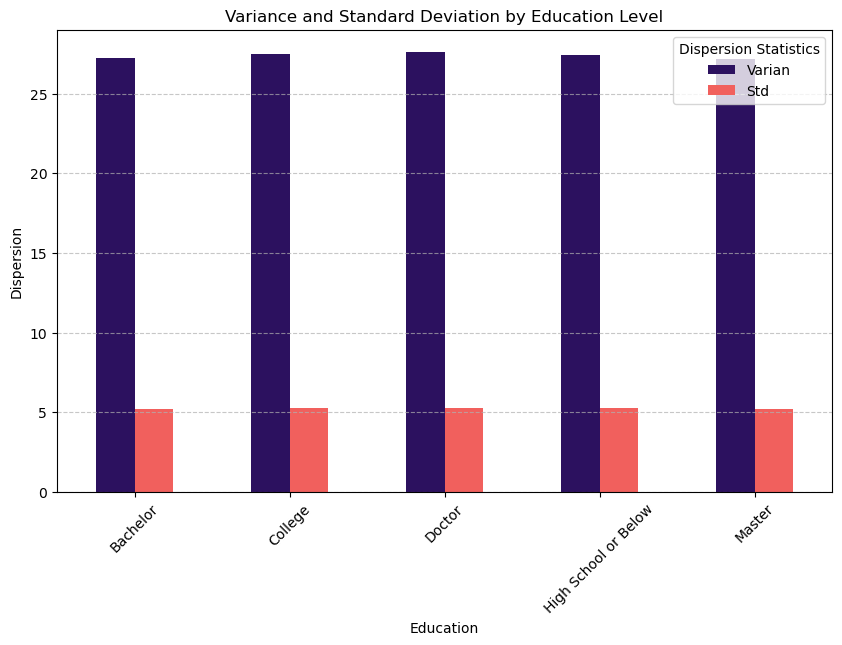

In [649]:
# DataFrame con las estadísticas de dispersión.
dispersion_df = pd.DataFrame({
    'Varian': varian,
    'Std': std
})

# Gráfico de barras.
colores= ['#2c115f', '#f1605d']
dispersion_df.plot(kind='bar', figsize=(10, 6), color=colores)

#Título y etiquetas.
plt.title('Variance and Standard Deviation by Education Level')
plt.ylabel('Dispersion')
plt.xlabel('Education')
plt.xticks(rotation=45)
plt.legend(title='Dispersion Statistics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


En esta gráfica podemos ver la  varianza y la desviación estándar.
Es interesante anotar que la varianza es bastante consistente en todos los niveles educativos, situándose alrededor de 27, mientras que la desviación estándar se mantiene estable en aproximadamente 5. Esto sugiere una relación estrecha entre ambas medidas.
En este caso, la desviación estándar no es muy grande, todos los valores están cerca de 5, lo que indica que los datos no varían significativamente con respecto al promedio en cada nivel educativo.

In [650]:
# 3. Prueba de Estadistíca: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa
# en el número de vuelos reservados entre los diferentes niveles educativos.
Bachelor = df_flights_education[df_flights_education["Education"]=='Bachelor']["Flights Booked"]
College = df_flights_education[df_flights_education["Education"]=='College']["Flights Booked"]
Doctor = df_flights_education[df_flights_education["Education"]=='Doctor']["Flights Booked"]
High_School = df_flights_education[df_flights_education["Education"]=='High School or Below']["Flights Booked"]
Master = df_flights_education[df_flights_education["Education"]=='Master']["Flights Booked"]


In [ ]:
# Función de prueba de hipótesis.
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney.

    Parámetros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar.

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos.
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo.
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas.
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado.
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia.
    alfa = 0.05

    # Resultados.
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara.
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")


In [ ]:
# Realizamos una prueba de hipótesis entre 'High_School' y 'Bachelor'.
prueba_hipotesis(High_School,Bachelor)



📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.1589)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 2409144796.0000, p-valor: 0.0360
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas)



In [ ]:
# Realizamos una prueba de hipótesis entre 'Bachelor' y 'College'.
prueba_hipotesis(Bachelor,College)



📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Desiguales (p = 0.0027)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 12834460862.5000, p-valor: 0.0023
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas)



In [ ]:
# Realizamos una prueba de hipótesis entre 'College' y 'Master'.
prueba_hipotesis(College,Master)



📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.7302)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 624388384.5000, p-valor: 0.2384
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)



In [ ]:
# Realizamos una prueba de hipótesis entre 'Master' y 'Doctor'.
prueba_hipotesis(Master, Doctor)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.8104)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 109499288.0000, p-valor: 0.4139
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)

